# Pneumonia Detection on Chest X-Rays

In [1]:
# Import data managing libraries 
import numpy as np
import pandas as pd

# Import Tensorflow 
import tensorflow.random as tfr
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Lambda, Input
from tensorflow.keras.layers import Conv2D

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Set the seed for repeatability
seed = 42

np.random.seed(seed) 
tfr.set_seed(seed)

# Explore our Data

In [15]:
# Create a path to the root folder and path to specific folders on my computer

data_path = 'data/chest_xray/'
data_path

train = data_path + 'train'
test = data_path + 'test'
val = data_path + 'val'

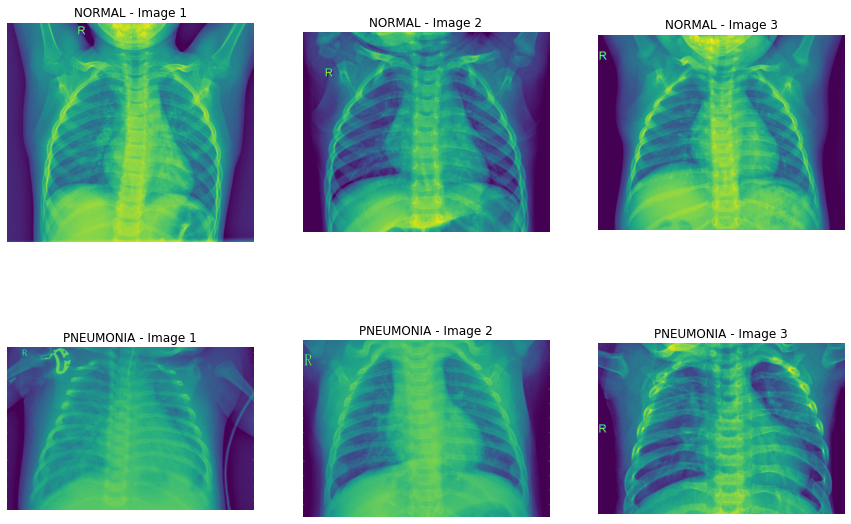

In [18]:
import os
import matplotlib.image as mpimg

def plot_few_images(folder_path, num_images=3):
    # Get a list of subdirectories in the folder
    subdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

    # Plot a few images from each subdirectory
    plt.figure(figsize=(15, 10))
    for i, subdirectory in enumerate(subdirectories, 1):
        subdirectory_path = os.path.join(folder_path, subdirectory)
        image_files = [f for f in os.listdir(subdirectory_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Plot up to num_images images from each subdirectory
        for j, image_file in enumerate(image_files[:num_images], 1):
            plt.subplot(len(subdirectories), num_images, (i - 1) * num_images + j)
            img = mpimg.imread(os.path.join(subdirectory_path, image_file))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{subdirectory} - Image {j}')

    plt.show()

# Example: Plot three images from each subdirectory within the 'train' folder
plot_few_images(train, num_images=3)


In [19]:
# Preprocess our Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path for data folders
train_data_dir = train
test_data_dir = test
val_data_dir = val

# Set the input size for images
img_size = (128, 128)

# Set up data generators for training, testing, and validation
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if you have more than two classes
)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

# Optionally, check the class indices assigned by Keras
print("Class indices:", train_generator.class_indices)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}
